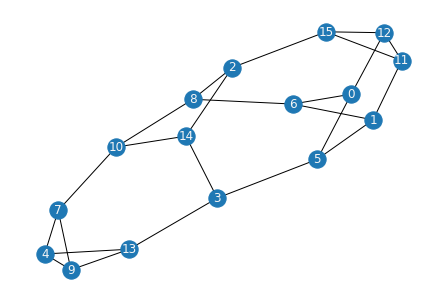

In [8]:
from maxcut_instance_generator import regular_graph

model = regular_graph(num_nodes=16, degree=3, draw=True)

In [9]:
from encoding import RandomAccessEncoder

# Quantum Random Access Encoders
qrac_1_1 = RandomAccessEncoder(1, 1)
qrac_2_1 = RandomAccessEncoder(2, 1)
qrac_3_1 = RandomAccessEncoder(3, 1)

# Hamiltonians
H_1_1 = qrac_1_1.generate_hamiltonian(model)
H_2_1 = qrac_2_1.generate_hamiltonian(model)
H_3_1 = qrac_3_1.generate_hamiltonian(model)

# Print Hamiltonians
# print(qrac_1_1.print_hamiltonian(H_1_1))
# print(qrac_2_1.print_hamiltonian(H_2_1))
print(qrac_3_1.print_hamiltonian(H_3_1))

(1.5+0j)XIXIII
(1.5+0j)XIYIII
(1.5+0j)XIIIZI
(1.5+0j)YIXIII
(1.5+0j)YIYIII
(1.5+0j)YIIXII
(1.5+0j)ZIIIXI
(1.5+0j)ZIIZII
(1.5+0j)ZIIIIX
(1.5+0j)IXXIII
(1.5+0j)IXIYII
(1.5+0j)IXIZII
(1.5+0j)IYZIII
(1.5+0j)IYIIYI
(1.5+0j)IYIYII
(1.5+0j)IIYIXI
(1.5+0j)IIZIYI
(1.5+0j)IZZIII
(1.5+0j)IZIIXI
(1.5+0j)IIIYYI
(1.5+0j)IZIZII
(1.5+0j)IIIXZI
(1.5+0j)IIIXIX
(1.5+0j)IIIIZX
(-12+0j)IIIIII
None


In [10]:
print(len(qrac_1_1.qubit_to_vertex_map), len(qrac_1_1.calculate_edge_among_qubits(model)))
print(len(qrac_2_1.qubit_to_vertex_map), len(qrac_2_1.calculate_edge_among_qubits(model)))
print(len(qrac_3_1.qubit_to_vertex_map), len(qrac_3_1.calculate_edge_among_qubits(model)))

16 24
9 16
6 11


In [11]:
import numpy as np
from vqe import VQEForQRAO

from scipy.optimize import minimize

# Example of Level = 1
vqe_1_1 = VQEForQRAO(
    hamiltonian=H_1_1, rotation_gate="normal", entanglement="compatible",
    num_layer=1, qubit_pairs=qrac_1_1.calculate_edge_among_qubits(model),
    printing=True,
)
vqe_2_1 = VQEForQRAO(
    hamiltonian=H_2_1, rotation_gate="normal", entanglement="compatible",
    num_layer=1, qubit_pairs=qrac_2_1.calculate_edge_among_qubits(model),
    printing=True,
)
vqe_3_1 = VQEForQRAO(
    hamiltonian=H_3_1, rotation_gate="normal", entanglement="compatible",
    num_layer=1, qubit_pairs=qrac_3_1.calculate_edge_among_qubits(model),
    printing=True,
)

cost_history_1_1, best_theta_list_1_1 = vqe_1_1.minimize()
cost_history_2_1, best_theta_list_2_1 = vqe_2_1.minimize()
cost_history_3_1, best_theta_list_3_1 = vqe_3_1.minimize()

Iter	cost
1/25000	-0.9969978537259365
2/25000	-0.9714002605555456
3/25000	-0.9969978537259374
4/25000	-1.8612667181684506
5/25000	-1.791234063180396
6/25000	-1.8612667181684497
7/25000	-2.7562975284972766
8/25000	-2.697853448215134
9/25000	-2.756297528497276
10/25000	-3.6272145281393824
11/25000	-3.567575555864095
12/25000	-3.6272145281393797
13/25000	-4.435457247656599
14/25000	-4.4057007758713365
15/25000	-4.435457247656599
16/25000	-5.279285130705911
17/25000	-5.209813076675004
18/25000	-5.279285130705909
19/25000	-5.601005359611793
20/25000	-5.585669224268371
21/25000	-5.601005359611793
22/25000	-6.115685335033629
23/25000	-6.100654090407405
24/25000	-6.11568533503363
25/25000	-6.635022461861226
26/25000	-6.594852875481578
27/25000	-6.635022461861225
28/25000	-7.262893959553238
29/25000	-7.256142836900222
30/25000	-7.262893959553238
31/25000	-7.760431285883446
32/25000	-7.759894494049426
33/25000	-7.760431285883445
34/25000	-8.096167099407477
35/25000	-8.07042075698767
36/25000	-8.

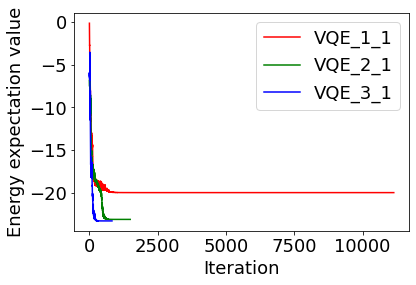

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["font.size"] = 18
plt.plot(cost_history_1_1, color="red", label="VQE_1_1")
plt.plot(cost_history_2_1, color="green", label="VQE_2_1")
plt.plot(cost_history_3_1, color="blue", label="VQE_3_1")
plt.xlabel("Iteration")
plt.ylabel("Energy expectation value")
plt.legend()
plt.show()

In [13]:
from rounding import MagicRounding
mr_1_1 = MagicRounding(1, 1, 10000, vqe_1_1, qrac_1_1)
mr_2_1 = MagicRounding(2, 1, 10000, vqe_2_1, qrac_2_1)
mr_3_1 = MagicRounding(3, 1, 10000, vqe_3_1, qrac_3_1)

sol_counts_1_1 = mr_1_1.round(best_theta_list_1_1)
sol_counts_2_1 = mr_2_1.round(best_theta_list_2_1)
sol_counts_3_1 = mr_3_1.round(best_theta_list_3_1)

In [16]:
maxcut_vals_1_1 = mr_1_1.get_objective_value_counts(model, sol_counts_1_1)
maxcut_vals_2_1 = mr_2_1.get_objective_value_counts(model, sol_counts_2_1)
maxcut_vals_3_1 = mr_3_1.get_objective_value_counts(model, sol_counts_3_1)

print(maxcut_vals_1_1)
print(maxcut_vals_2_1)
print(maxcut_vals_3_1)

{20.0: 10000}
{14.0: 1661, 13.0: 1603, 15.0: 1356, 12.0: 1306, 16.0: 986, 11.0: 877, 10.0: 593, 17.0: 586, 9.0: 311, 18.0: 284, 19.0: 144, 8.0: 128, 20.0: 64, 7.0: 62, 6.0: 21, 21.0: 9, 5.0: 5, 4.0: 4}
{13.0: 1547, 12.0: 1530, 14.0: 1363, 11.0: 1285, 10.0: 1118, 15.0: 908, 9.0: 720, 16.0: 461, 8.0: 410, 7.0: 199, 17.0: 177, 6.0: 116, 18.0: 69, 5.0: 44, 19.0: 25, 4.0: 10, 20.0: 9, 3.0: 8, 21.0: 1}


In [22]:
model.solve().get_objective_value()

21.0